#Importation des bibliothèques et des données

In [1]:

import pandas as pd
from sklearn.linear_model import RidgeClassifier, LogisticRegression
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


trainData_path = 'train.csv'
testData_path = 'test.csv'

trainData = pd.read_csv(trainData_path)
testData= pd.read_csv(testData_path)


# Exploration et traitement des données
1. Vue d'ensemble et statistiques descriptives

2. Traitement des Valeurs manquantes

3. Distribution des variables (graphiques)

4. Traitement des outliers

5. Mise à l'échelle des features


## 1. Vue d'ensemble et statistique descriptives



In [2]:
trainData.head(5)

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


In [3]:
testData.head(5)

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents
0,517754,highway,2,0.34,45,night,clear,True,True,afternoon,True,True,1
1,517755,urban,3,0.04,45,dim,foggy,True,False,afternoon,True,False,0
2,517756,urban,2,0.59,35,dim,clear,True,False,afternoon,True,True,1
3,517757,rural,4,0.95,35,daylight,rainy,False,False,afternoon,False,False,2
4,517758,highway,2,0.86,35,daylight,clear,True,False,evening,False,True,3


In [4]:
trainData.shape, testData.shape

((517754, 14), (172585, 13))

In [5]:
x_train=trainData.drop(columns=['accident_risk'])
y_train=trainData['accident_risk']
x_test=testData

In [6]:
x_test.columns, x_train.columns

(Index(['id', 'road_type', 'num_lanes', 'curvature', 'speed_limit', 'lighting',
        'weather', 'road_signs_present', 'public_road', 'time_of_day',
        'holiday', 'school_season', 'num_reported_accidents'],
       dtype='object'),
 Index(['id', 'road_type', 'num_lanes', 'curvature', 'speed_limit', 'lighting',
        'weather', 'road_signs_present', 'public_road', 'time_of_day',
        'holiday', 'school_season', 'num_reported_accidents'],
       dtype='object'))

In [7]:
(x_test.columns==x_train.columns).all()

np.True_

In [8]:
features=list(x_train.columns)
features

['id',
 'road_type',
 'num_lanes',
 'curvature',
 'speed_limit',
 'lighting',
 'weather',
 'road_signs_present',
 'public_road',
 'time_of_day',
 'holiday',
 'school_season',
 'num_reported_accidents']

In [9]:
x_train_id=x_train.pop('id')
x_test_id=x_test.pop('id')

In [10]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   road_type               517754 non-null  object 
 1   num_lanes               517754 non-null  int64  
 2   curvature               517754 non-null  float64
 3   speed_limit             517754 non-null  int64  
 4   lighting                517754 non-null  object 
 5   weather                 517754 non-null  object 
 6   road_signs_present      517754 non-null  bool   
 7   public_road             517754 non-null  bool   
 8   time_of_day             517754 non-null  object 
 9   holiday                 517754 non-null  bool   
 10  school_season           517754 non-null  bool   
 11  num_reported_accidents  517754 non-null  int64  
dtypes: bool(4), float64(1), int64(3), object(4)
memory usage: 33.6+ MB


In [11]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172585 entries, 0 to 172584
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   road_type               172585 non-null  object 
 1   num_lanes               172585 non-null  int64  
 2   curvature               172585 non-null  float64
 3   speed_limit             172585 non-null  int64  
 4   lighting                172585 non-null  object 
 5   weather                 172585 non-null  object 
 6   road_signs_present      172585 non-null  bool   
 7   public_road             172585 non-null  bool   
 8   time_of_day             172585 non-null  object 
 9   holiday                 172585 non-null  bool   
 10  school_season           172585 non-null  bool   
 11  num_reported_accidents  172585 non-null  int64  
dtypes: bool(4), float64(1), int64(3), object(4)
memory usage: 11.2+ MB


##2. Traitement des valeurs manquants

In [12]:
x_test.isnull().any().any(), x_train.isnull().any().any()

(np.False_, np.False_)

##3. Distributions des variables

###Distribution de la variable cible





In [13]:
trainData['accident_risk'].describe()

count    517754.000000
mean          0.352377
std           0.166417
min           0.000000
25%           0.230000
50%           0.340000
75%           0.460000
max           1.000000
Name: accident_risk, dtype: float64

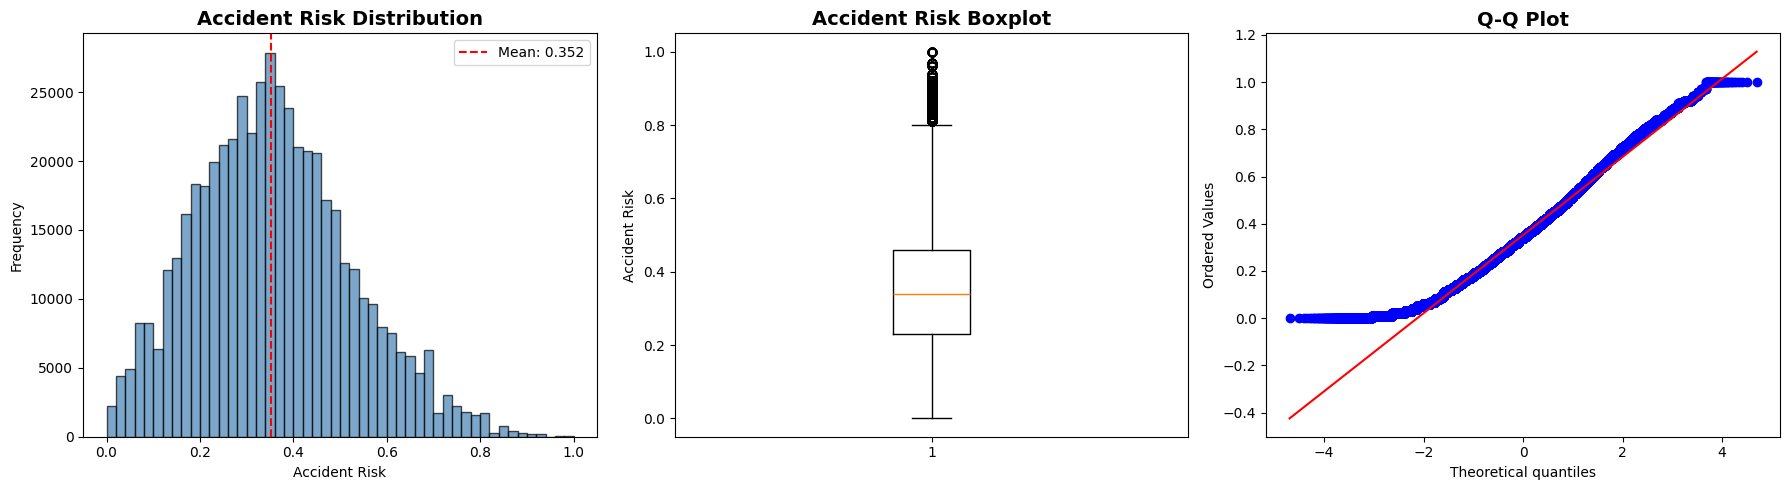


 Statistique de la variable cible:
   Mean: 0.3524
   Median: 0.3400
   Std: 0.1664
   Skewness: 0.3784
   Kurtosis: -0.0767


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].hist(trainData['accident_risk'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Accident Risk Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Accident Risk')
axes[0].set_ylabel('Frequency')
axes[0].axvline(trainData['accident_risk'].mean(), color='red', linestyle='--', label=f'Mean: {trainData["accident_risk"].mean():.3f}')
axes[0].legend()

axes[1].boxplot(trainData['accident_risk'], vert=True)
axes[1].set_title('Accident Risk Boxplot', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Accident Risk')

from scipy import stats
stats.probplot(trainData['accident_risk'], dist="norm", plot=axes[2])
axes[2].set_title('Q-Q Plot', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n Statistique de la variable cible:")
print(f"   Mean: {trainData['accident_risk'].mean():.4f}")
print(f"   Median: {trainData['accident_risk'].median():.4f}")
print(f"   Std: {trainData['accident_risk'].std():.4f}")
print(f"   Skewness: {trainData['accident_risk'].skew():.4f}")
print(f"   Kurtosis: {trainData['accident_risk'].kurtosis():.4f}")


###Distribution des Features





Colonnes catégorielles : ['road_type', 'lighting', 'weather', 'time_of_day']

--- Analyse de la colonne : road_type ---
road_type
highway    173672
rural      172719
urban      171363
Name: count, dtype: int64
Pourcentage de valeurs manquantes : 0.00%


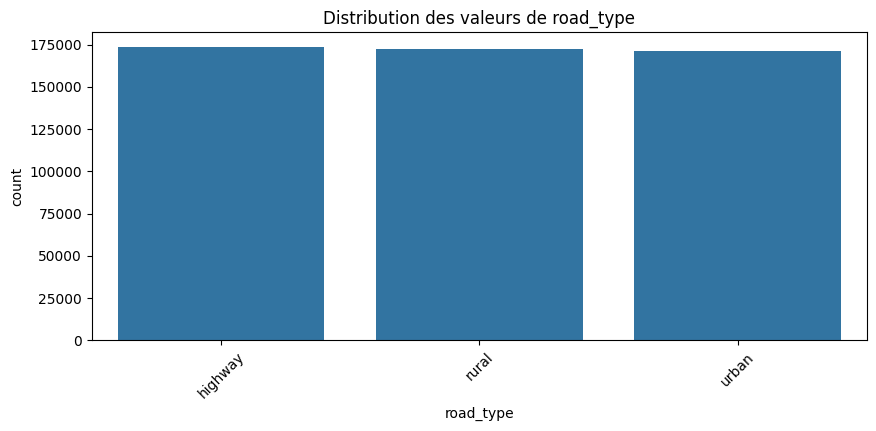


--- Analyse de la colonne : lighting ---
lighting
dim         183826
daylight    178015
night       155913
Name: count, dtype: int64
Pourcentage de valeurs manquantes : 0.00%


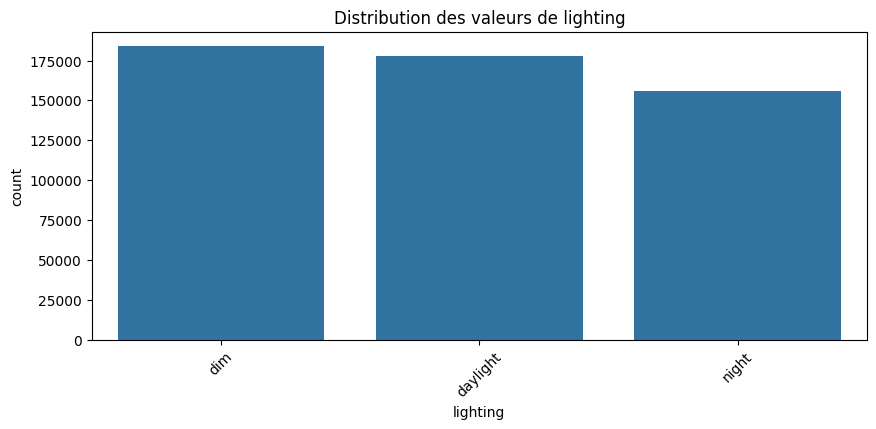


--- Analyse de la colonne : weather ---
weather
foggy    181463
clear    179306
rainy    156985
Name: count, dtype: int64
Pourcentage de valeurs manquantes : 0.00%


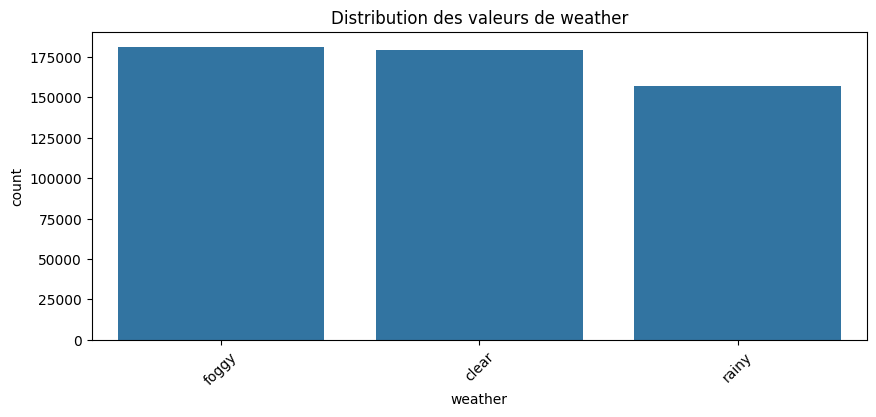


--- Analyse de la colonne : time_of_day ---
time_of_day
morning      173410
evening      172837
afternoon    171507
Name: count, dtype: int64
Pourcentage de valeurs manquantes : 0.00%


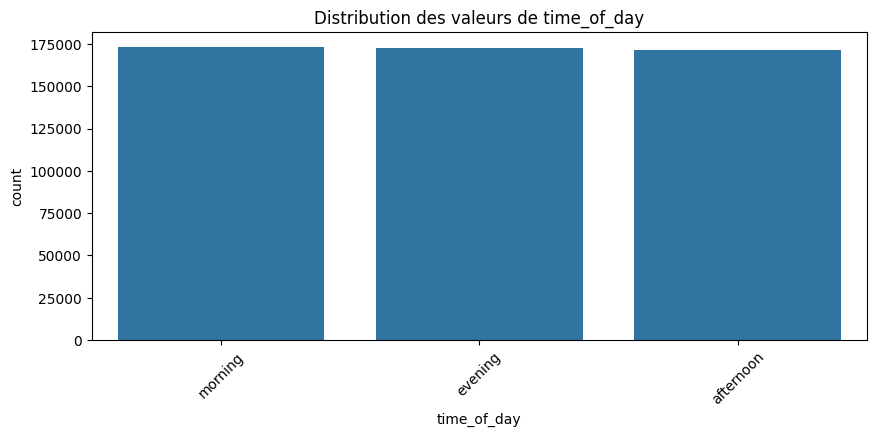

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cat_cols = x_train.select_dtypes(include=['object', 'category']).columns

print("Colonnes catégorielles :", list(cat_cols))

for col in cat_cols:
    print(f"\n--- Analyse de la colonne : {col} ---")
    print(x_train[col].value_counts())
    missing_pct = x_train[col].isna().mean() * 100
    print(f"Pourcentage de valeurs manquantes : {missing_pct:.2f}%")

    plt.figure(figsize=(10,4))
    sns.countplot(data=x_train, x=col, order=x_train[col].value_counts().index)
    plt.title(f"Distribution des valeurs de {col}")
    plt.xticks(rotation=45)
    plt.show()


In [16]:
#test statiqtique d'Anova
print(f"test statiqtique d'Anova \:")
from scipy.stats import f_oneway

for col in cat_cols:
    if trainData[col].dtype != 'bool':
        groups = [trainData[trainData[col] == val]['accident_risk'].values
                 for val in trainData[col].unique()]
        f_stat, p_value = f_oneway(*groups)
        print(f"   {col:25s} - F-stat: {f_stat:8.2f}, p-value: {p_value:.2e}")

test statiqtique d'Anova \:
   road_type                 - F-stat:   119.42, p-value: 1.40e-52
   lighting                  - F-stat: 71752.06, p-value: 0.00e+00
   weather                   - F-stat: 10189.45, p-value: 0.00e+00
   time_of_day               - F-stat:    26.39, p-value: 3.47e-12


In [17]:
numeric_features = list(x_train.select_dtypes(include=["int64", "float64"]).columns)
numeric_features

['num_lanes', 'curvature', 'speed_limit', 'num_reported_accidents']

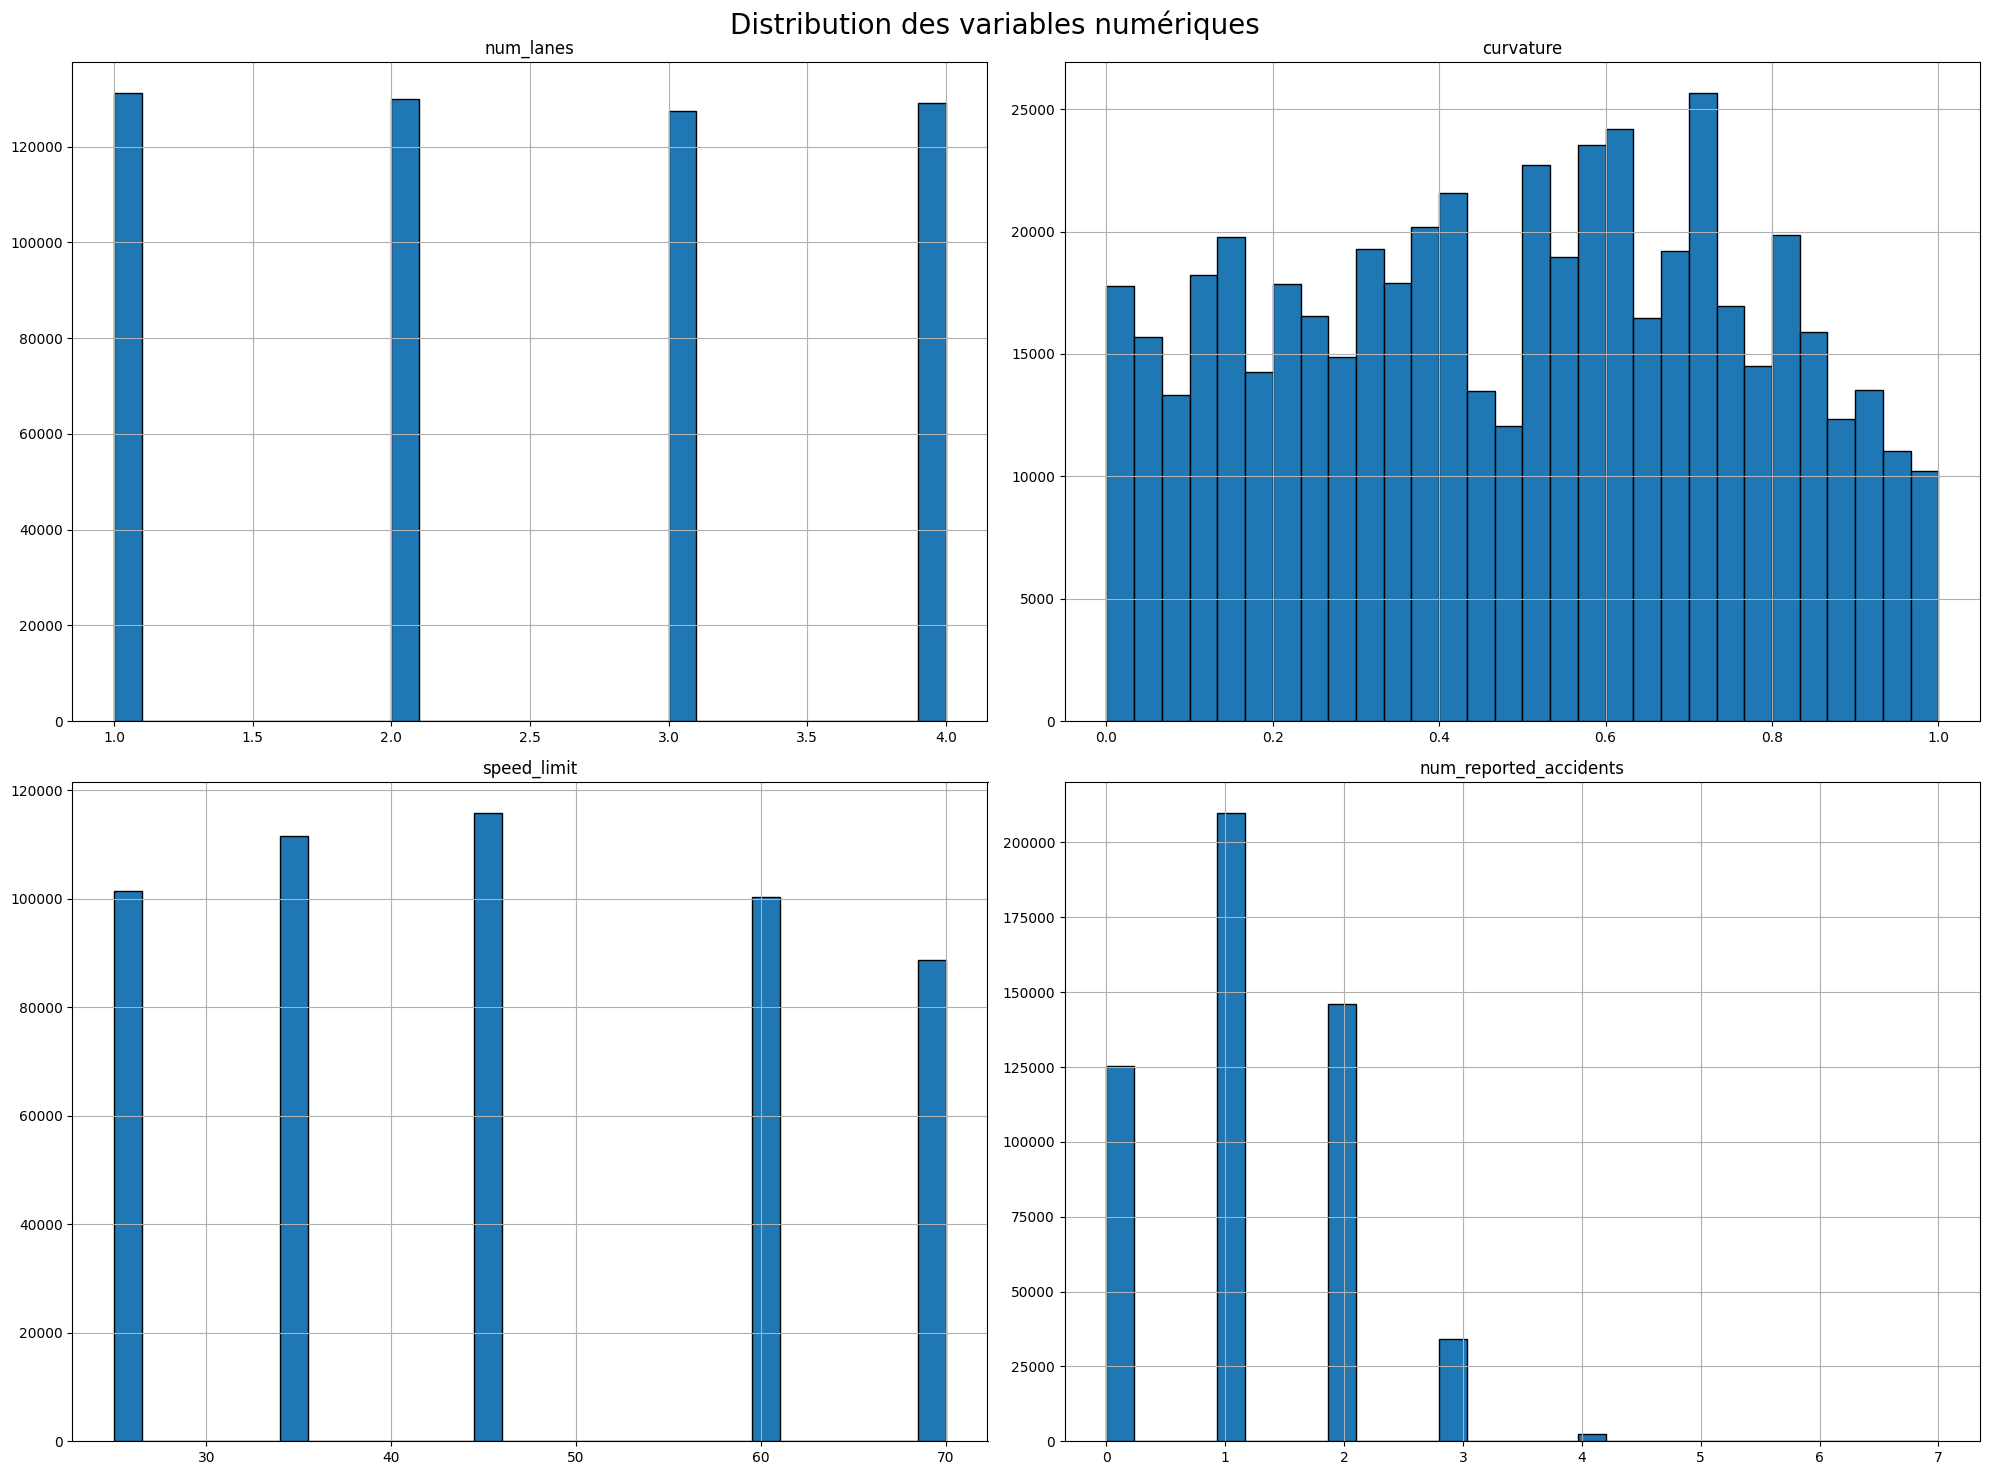

In [18]:

# Histogrammes
x_train[numeric_features].hist(figsize=(20, 15), bins=30, edgecolor='black')
plt.suptitle("Distribution des variables numériques", fontsize=20)
plt.tight_layout()
plt.show()


##Matrice de corrélation

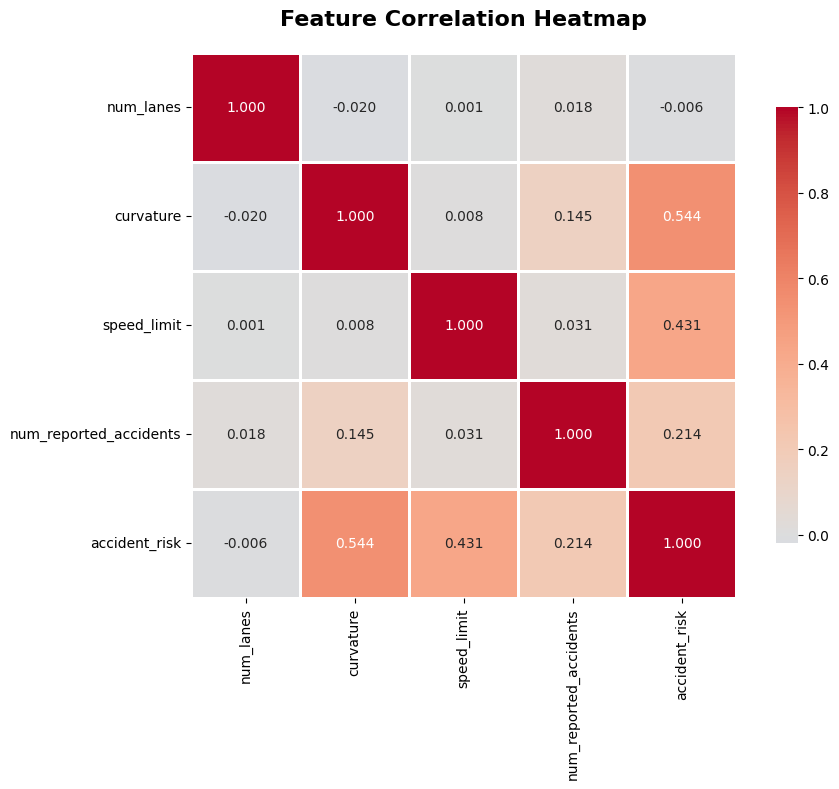

In [19]:
plt.figure(figsize=(10, 8))
correlation_matrix = trainData[numeric_features + ['accident_risk']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

##Extraction des features categorielle nominales et categorielle ordinale

In [20]:
# Liste des features catégorielles nominales
categorical_nominal = [
    "road_type",
    "lighting",
    "weather",
    "road_signs_present",
    "public_road",
    "holiday",
    "school_season"
]

# Liste des features catégorielles ordinales
categorical_ordinal = [
    "time_of_day"
]




## 4. Traitement des Outliers

In [21]:
import pandas as pd

# Exemple : df est ton DataFrame avec des features numériques
# Détection des outliers avec IQR
def detect_outliers_iqr(df, features):
    outliers = {}
    for col in features:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # indices des valeurs aberrantes
        outlier_indices = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outliers[col] = outlier_indices.tolist()

    return outliers

# Exemple d’utilisation
numeric_features = x_train.select_dtypes(include=["int64", "float64"]).columns
outliers_dict = detect_outliers_iqr(x_train, numeric_features)

# Affichage
for col, idx in outliers_dict.items():
    print(f"{col}: {len(idx)} outliers détectés")


num_lanes: 0 outliers détectés
curvature: 0 outliers détectés
speed_limit: 0 outliers détectés
num_reported_accidents: 2649 outliers détectés


##Traitements des outliers en affichant les relations (feature et target)

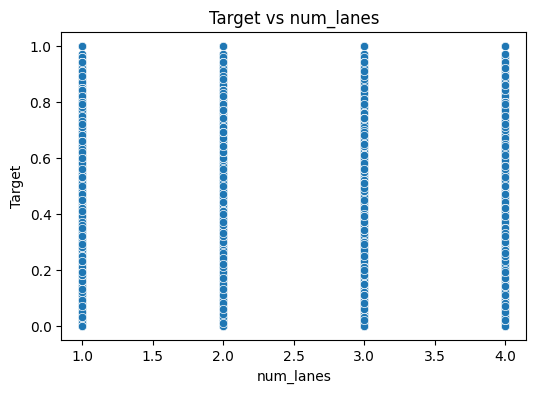

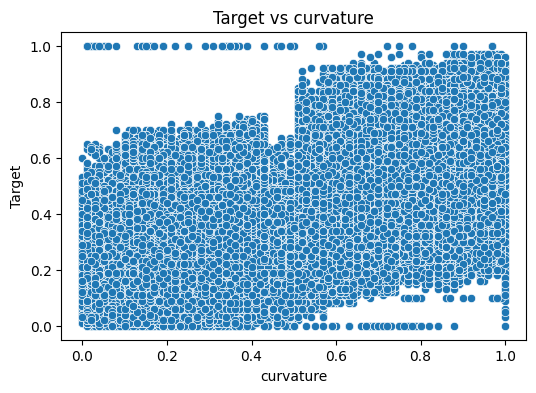

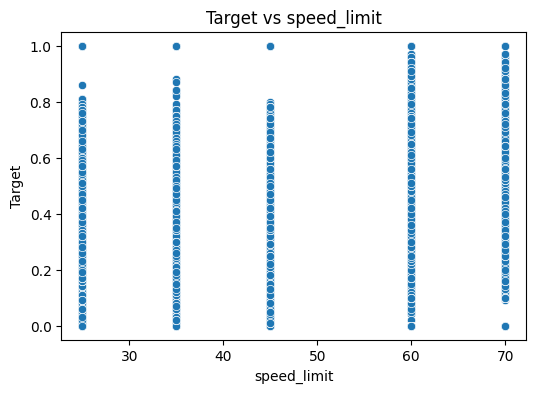

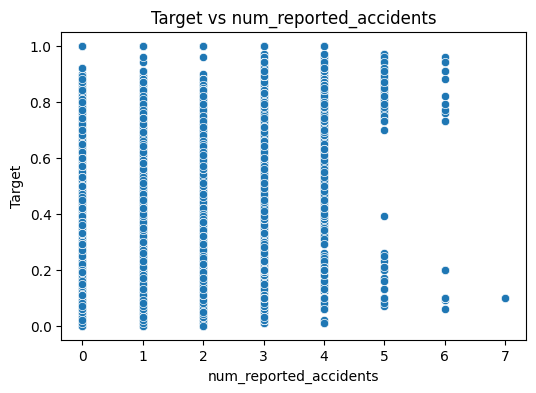

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Exemple : df = dataframe contenant les features et y
df = pd.concat([x_train, y_train.rename('target')], axis=1)

numerical_features = x_train.select_dtypes(include=np.number).columns

# Tracer chaque feature
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[feature], y=df['target'])
    plt.xlabel(feature)
    plt.ylabel('Target')
    plt.title(f'Target vs {feature}')
    plt.show()


In [23]:
#Traitement des outliers
from sklearn.ensemble import IsolationForest

# On inclut la target pour tenir compte de la relation

df= pd.concat([x_train, y_train.rename('accident_risk')], axis=1)
numerical_features = x_train.select_dtypes(include=np.number).columns.tolist()
X_all = df[numerical_features + ['accident_risk']]

iso = IsolationForest(contamination=0.000001, random_state=42)
outliers = iso.fit_predict(X_all)

# -1 = outlier, 1 = normal
df_clean = df[outliers == 1]

print(f"Dimensions avant : {df.shape}")
print(f"Dimensions après nettoyage (IsolationForest) : {df_clean.shape}")


Dimensions avant : (517754, 13)
Dimensions après nettoyage (IsolationForest) : (517753, 13)


In [24]:
x_train=df_clean.drop(columns=['accident_risk'])
y_train=df_clean['accident_risk']

_n_nun#Feature engineering

In [25]:
def create_features(df):
    """Advanced feature engineering"""
    df = df.copy()

    # 1. Polynomial features for key numerical variables
    df['curvature_squared'] = df['curvature'] ** 2
    df['curvature_cubed'] = df['curvature'] ** 3
    df['speed_squared'] = df['speed_limit'] ** 2

    # 2. Binned features
    df['curvature_bin'] = pd.cut(df['curvature'], bins=[0, 0.3, 0.6, 1.0], labels=[0, 1, 2],include_lowest=True,right=True)
    df['speed_category'] = pd.cut(df['speed_limit'], bins=[0, 30, 50, 100], labels=[0, 1, 2])

    # 3. Interaction features
    df['speed_curvature'] = df['speed_limit'] * df['curvature']
    df['lanes_curvature'] = df['num_lanes'] * df['curvature']
    df['speed_lanes'] = df['speed_limit'] * df['num_lanes']
    df['accidents_curvature'] = df['num_reported_accidents'] * df['curvature']
    df['accidents_speed'] = df['num_reported_accidents'] * df['speed_limit']

    # 4. Risk score combinations
    df['high_risk_combo'] = ((df['curvature'] > 0.5) & (df['speed_limit'] >= 60)).astype(int)
    df['weather_lighting_risk'] = ((df['weather'] == 'foggy') | (df['weather'] == 'rainy')) & \
                                   ((df['lighting'] == 'dim') | (df['lighting'] == 'night'))
    df['weather_lighting_risk'] = df['weather_lighting_risk'].astype(int)

    # 5. Categorical aggregations
    df['is_night'] = (df['lighting'] == 'night').astype(int)
    df['is_bad_weather'] = df['weather'].isin(['foggy', 'rainy']).astype(int)
    df['is_highway'] = (df['road_type'] == 'highway').astype(int)
    df['is_urban'] = (df['road_type'] == 'urban').astype(int)

    # 6. Time-based features
    df['is_peak_time'] = df['time_of_day'].isin(['morning', 'evening']).astype(int)
    df['is_weekend'] = df['holiday'].astype(int)

    # 7. Safety features
    df['safety_score'] = df['road_signs_present'].astype(int) * 2 + \
                         (df['lighting'] == 'daylight').astype(int) + \
                         (df['weather'] == 'clear').astype(int)

    df['danger_score'] = (df['curvature'] > 0.6).astype(int) + \
                         (df['speed_limit'] >= 60).astype(int) + \
                         df['is_bad_weather'] + df['is_night'] + \
                         (df['num_reported_accidents'] >= 2).astype(int)

    # 8. Ratio features
    df['accidents_per_lane'] = df['num_reported_accidents'] / (df['num_lanes'] + 1)
    df['risk_intensity'] = df['curvature'] * df['speed_limit'] / 50

    return df


In [26]:
x_train_new=create_features(x_train)
x_test_new=create_features(x_test)

##Préparation des données pour les modèles Light Gbm et catboost

In [27]:
categorical_features=x_train_new.select_dtypes(include=['category','bool','object']).columns
categorical_features

Index(['road_type', 'lighting', 'weather', 'road_signs_present', 'public_road',
       'time_of_day', 'holiday', 'school_season', 'curvature_bin',
       'speed_category'],
      dtype='object')

In [28]:
x_train_new[categorical_features]=x_train_new[categorical_features].astype('category')
x_test_new[categorical_features]=x_test_new[categorical_features].astype('category')

In [29]:
##Rendre de type categorielles les features catégorielles mais enregistré en int 
numeric_categorical_features=['is_night', 'is_bad_weather', 'is_highway',
       'is_urban', 'is_peak_time', 'is_weekend']

x_train_new[numeric_categorical_features]=x_train_new[numeric_categorical_features].astype('category')
x_test_new[numeric_categorical_features]=x_test_new[numeric_categorical_features].astype('category')

    


###transformer en chaine de caractères les features catégorielles mais avec des valeurs numériques

In [30]:
cat_features_with_numeric_values=["curvature_bin","speed_category",'is_night', 'is_bad_weather', 'is_highway',
       'is_urban', 'is_peak_time', 'is_weekend']

In [31]:
x_train_new[cat_features_with_numeric_values]=x_train_new[cat_features_with_numeric_values].astype(str).astype('category')
x_test_new[cat_features_with_numeric_values]=x_test_new[cat_features_with_numeric_values].astype(str).astype('category')

In [32]:
cat_cols=list(x_train_new.select_dtypes(include=['category']).columns)
cat_cols

['road_type',
 'lighting',
 'weather',
 'road_signs_present',
 'public_road',
 'time_of_day',
 'holiday',
 'school_season',
 'curvature_bin',
 'speed_category',
 'is_night',
 'is_bad_weather',
 'is_highway',
 'is_urban',
 'is_peak_time',
 'is_weekend']

In [33]:
x_train_new.info('display.max_columns', None)

<class 'pandas.core.frame.DataFrame'>
Index: 517753 entries, 0 to 517753
Data columns (total 34 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   road_type               517753 non-null  category
 1   num_lanes               517753 non-null  int64   
 2   curvature               517753 non-null  float64 
 3   speed_limit             517753 non-null  int64   
 4   lighting                517753 non-null  category
 5   weather                 517753 non-null  category
 6   road_signs_present      517753 non-null  category
 7   public_road             517753 non-null  category
 8   time_of_day             517753 non-null  category
 9   holiday                 517753 non-null  category
 10  school_season           517753 non-null  category
 11  num_reported_accidents  517753 non-null  int64   
 12  curvature_squared       517753 non-null  float64 
 13  curvature_cubed         517753 non-null  float64 
 14  speed_squ

In [34]:
#Mise à jour de la liste numeric_features 

numeric_features=list(x_train_new.select_dtypes(include=['float64','int64']))



##Comparaison des Modèles et validation croisé

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import LabelEncoder


#cat model
cat_model = CatBoostRegressor(
    iterations=500,
    depth=8,
    learning_rate=0.05,
    loss_function='RMSE',
    cat_features=cat_cols,
    verbose=0,
    random_seed=42
)
#lightGbm model
lgbm_model = LGBMRegressor(
    n_estimators=500,
    num_leaves=31,
    learning_rate=0.05,
    objective='regression',
    random_state=42
)

#  Définir la validation croisée et la métrique RMSE
cv = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_scorer = make_scorer(mean_squared_error, squared=False)

#  Cross-validation
print("Évaluation en cross-validation...")

cat_rmse = -cross_val_score(cat_model, x_train_new, y_train, cv=cv, scoring='neg_root_mean_squared_error')
lgbm_rmse = -cross_val_score(lgbm_model, x_train_new, y_train, cv=cv, scoring='neg_root_mean_squared_error')

# Résultats
print("\n Résultats Cross-Validation (RMSE moyen sur 5 folds) :")
print(f"CatBoost RMSE : {cat_rmse.mean():.4f} ± {cat_rmse.std():.4f}")
print(f"LightGBM RMSE : {lgbm_rmse.mean():.4f} ± {lgbm_rmse.std():.4f}")

#  Conclusion : meilleur modèle
if cat_rmse.mean() < lgbm_rmse.mean():
    print("\n Le modèle **CatBoost** généralise le mieux (RMSE plus faible).")
else:
    print("\n Le modèle **LightGBM** généralise le mieux (RMSE plus faible).")

'from sklearn.model_selection import cross_val_score, KFold\nfrom sklearn.metrics import make_scorer, mean_squared_error\nfrom catboost import CatBoostRegressor\nfrom lightgbm import LGBMRegressor\nfrom sklearn.datasets import fetch_california_housing\nfrom sklearn.preprocessing import LabelEncoder\n\n\n#cat model\ncat_model = CatBoostRegressor(\n    iterations=500,\n    depth=8,\n    learning_rate=0.05,\n    loss_function=\'RMSE\',\n    cat_features=cat_cols,\n    verbose=0,\n    random_seed=42\n)\n#lightGbm model\nlgbm_model = LGBMRegressor(\n    n_estimators=500,\n    num_leaves=31,\n    learning_rate=0.05,\n    objective=\'regression\',\n    random_state=42\n)\n\n#  Définir la validation croisée et la métrique RMSE\ncv = KFold(n_splits=5, shuffle=True, random_state=42)\nrmse_scorer = make_scorer(mean_squared_error, squared=False)\n\n#  Cross-validation\nprint("Évaluation en cross-validation...")\n\ncat_rmse = -cross_val_score(cat_model, x_train_new, y_train, cv=cv, scoring=\'neg_ro

##Choix des hyperparamètres

In [ ]:
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error, make_scorer

# Define the parameter grid
param_grid = {
    'num_leaves': np.arange(20, 256, 20),
    'learning_rate': np.linspace(0.005, 0.15, 10),
    'feature_fraction': np.linspace(0.6, 1.0, 5),
    'bagging_fraction': np.linspace(0.6, 1.0, 5),
    'bagging_freq': [0, 1, 5, 10],
    'min_child_samples': [5, 10, 20, 50, 100],
    'lambda_l1': np.linspace(0, 5, 10),
    'lambda_l2': np.linspace(0, 5, 10),
    'max_depth': [-1, 5, 10, 15, 20],
    'min_split_gain': [0.0, 0.1, 0.2, 0.3],
}

# Initialize model
model = lgb.LGBMRegressor(
    objective='regression',
    metric='rmse',
    verbosity=-1,
    random_state=42,
    n_estimators=1000
)

# Define RMSE scorer
rmse_scorer = make_scorer(root_mean_squared_error, greater_is_better=False)

# Replace RandomizedSearchCV with GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring=rmse_scorer,
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit the grid search
grid_search.fit(x_train_new, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best RMSE:", -grid_search.best_score_)



'import lightgbm as lgb\nimport numpy as np\nfrom sklearn.model_selection import GridSearchCV, train_test_split\nfrom sklearn.metrics import mean_squared_error, root_mean_squared_error, make_scorer\n\n# Define the parameter grid\nparam_grid = {\n    \'num_leaves\': np.arange(20, 256, 20),\n    \'learning_rate\': np.linspace(0.005, 0.15, 10),\n    \'feature_fraction\': np.linspace(0.6, 1.0, 5),\n    \'bagging_fraction\': np.linspace(0.6, 1.0, 5),\n    \'bagging_freq\': [0, 1, 5, 10],\n    \'min_child_samples\': [5, 10, 20, 50, 100],\n    \'lambda_l1\': np.linspace(0, 5, 10),\n    \'lambda_l2\': np.linspace(0, 5, 10),\n    \'max_depth\': [-1, 5, 10, 15, 20],\n    \'min_split_gain\': [0.0, 0.1, 0.2, 0.3],\n}\n\n# Initialize model\nmodel = lgb.LGBMRegressor(\n    objective=\'regression\',\n    metric=\'rmse\',\n    verbosity=-1,\n    random_state=42,\n    n_estimators=1000\n)\n\n# Define RMSE scorer\nrmse_scorer = make_scorer(root_mean_squared_error, greater_is_better=False)\n\n# Replace R

#Modèle light GBM sans stacking

In [45]:
import lightgbm as lgb

# Création du modèle
model = lgb.LGBMRegressor(
    objective='regression',      # régression continue
    boosting_type='gbdt',        # gradient boosting classique
    n_estimators=1000,           # nombre d'arbres
    learning_rate=0.05,          # pas trop rapide pour ne pas sur-apprendre
    num_leaves=31,               # complexe mais pas trop
    max_depth=10,                # limite la profondeur
    min_child_samples=20,        # minimum de lignes par feuille
    subsample=0.8,               # pour bagging
    subsample_freq=1,
    colsample_bytree=0.8,        # pour le fractionnement des features
    reg_alpha=0.1,               # régularisation L1
    reg_lambda=0.1,              # régularisation L2
    random_state=42,
    n_jobs=-1
)

# Entraînement
model.fit(x_train_new, y_train)

# Prédiction sur le test set
y_pred = model.predict(x_test_new)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016717 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1521
[LightGBM] [Info] Number of data points in the train set: 517753, number of used features: 34
[LightGBM] [Info] Start training from score 0.352376


##Stacking

In [38]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import OrdinalEncoder,RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

# -----------------------
# Preprocessing
# -----------------------
numeric_transformer = RobustScaler()
categorical_transformer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

preprocessor = ColumnTransformer([
    ('num', numeric_transformer,  numeric_features),
    ('cat', categorical_transformer, cat_cols)
])


# Base Models (more diverse)

base_models = [
    ('rf', RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42)),
    ('lgbm', LGBMRegressor(num_leaves=31, learning_rate=0.05, n_estimators=500, random_state=42)),

    ('xgb', XGBRegressor(learning_rate=0.05, n_estimators=500, max_depth=6, random_state=42))
]


# Meta-model (RidgeCV handles collinearity)

meta_model = CatBoostRegressor(
    iterations=300,
    depth=4,
    learning_rate=0.05,
    verbose=0,
    random_state=42
)


# Stacking Regressor with cross-validation (important!)

stacking_model = make_pipeline(
    preprocessor,
    StackingRegressor(
        estimators=base_models,
        final_estimator=meta_model,
        cv=5,
        passthrough=True,   # give meta-model access to original features
        n_jobs=4
    )
)


# Train / Test

stacking_model.fit(x_train_new, y_train)
y_pred = stacking_model.predict(x_test_new)

print("stacking terminé")


c:\Users\Zoghlami Souad\Documents\dossier_aziz\KAGGLE\kaggle_python_environment\venv_new\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


stacking terminé


##Interprétation

                feature  importance
2             curvature        3990
17      speed_curvature        3035
20  accidents_curvature        2644
18      lanes_curvature        2470
5               weather        1575
31         danger_score        1498
4              lighting        1430
21      accidents_speed        1224
19          speed_lanes        1143
30         safety_score        1111


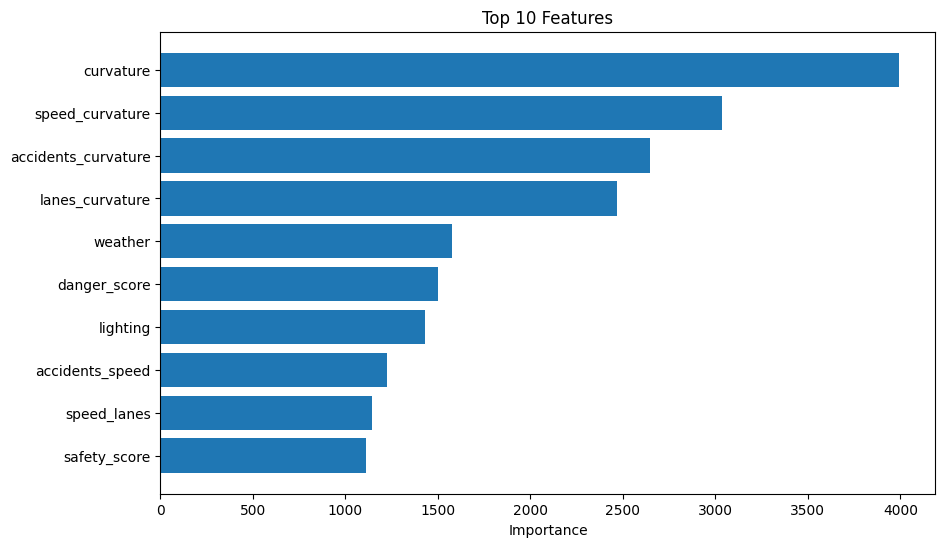

In [46]:
import pandas as pd
import matplotlib.pyplot as plt


feature_importances = model.feature_importances_
features = x_train_new.columns


fi_df = pd.DataFrame({'feature': features, 'importance': feature_importances})
fi_df = fi_df.sort_values('importance', ascending=False)


print(fi_df.head(10))


plt.figure(figsize=(10,6))
plt.barh(fi_df['feature'][:10][::-1], fi_df['importance'][:10][::-1])
plt.xlabel('Importance')
plt.title('Top 10 Features')
plt.show()


##Soumission des résultats

In [40]:
import pandas as pd
import os

df = pd.DataFrame({'id': x_test_id,'accident_risk': y_pred
})
df.to_csv("prediction.csv", index=False)
print("Fichier 'prediction.csv' créé dans le dossier courant.")




Fichier 'prediction.csv' créé dans le dossier courant.
